# Discover project Ames housing data

# Aanpak van dit project

## Door: Eric Ruis, Laurence Frank

Eerste fase is het begrijpen van de data set. Wat betekenen de variabelen (domein kennis)? Hoe zijn de variablen verdeeld? Zijn er missende waarden, outliers? Welke variabelen correleren met elkaar en met de uitkomst maat?



## Business Understanding

Het doel is om de prijs van huizen te voorspellen op basis van een tachtigtal kenmerken van de huizen. 



## Data Understanding

De data staan uitgebreid beschreven op deze Kaggle webpagina: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


De data set bestaat uit 80 variabelen die verschillende aspecten van het huis beschrijven in de volgende categorieen: de kenmerken van het huis zelf (indeling, oppervlak, stijl, bouwjaar, kwaliteit, etc), kenmerken van de grond waarop het huis staat en kenmerken van de buurt. 



We beginnen met een setup van python met de meest gebruikte libraries.

In [176]:
# PEP-8: group imports from standard library first, alphabetical order
from pathlib import Path # use pathlib for working with paths
import sys
import tarfile
import warnings

# imports from third-party modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import requests
from requests.compat import urljoin
import sklearn
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Initialize the random number generator at a specific state to be able reproduce
# the random selections in this notebook
np.random.seed(42)


**Importeren van de data**

In [177]:
ames = pd.read_csv("https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv?raw=true")
ames.shape

(2930, 82)

In [87]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Exploreer de variabelen

Op basis van "gezond verstand" gaan we na of bepaalde variabelen een verband hebben met de uitkomst variabele `SalePrice`. Dit is een globale check op de data om te kijken of we variabelen waar nauwelijks informatie in zit, weg kunnen laten. 

We zien al in de informatie over de data, hierboven, dat `Alley`, `Pool QC` en `Misc Feature` nauwelijks observaties hebben. 

Beschrijvende statistieken van de training data set. Bekijk de verdeling van de uitkomst variabele in verschillende subgroepen, zoals buurt, staat van het huis, type woning, Condition2


### Beschrijving van de categorische variabelen

In [178]:
ames.describe(include = np.object)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


### Beschrijving van de numerieke variabelen

In [89]:
ames.describe(exclude = np.object)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Exploreren van de relatie tussen kenmerken van de huizen en de verkoopprijs

Op basis van gezond verstand verwachten we bijvoorbeeld dat de buurt (`Neighborhood`) waarin een huis staat, invloed heeft op de verkoopprijs. Dat geldt ook voor het type huis (`House Style`).

Van een aantal andere kenmerken, verwachten we dat er niet veel samenhang met de verkoopprijs zal zijn, zoals bijvoorbeeld `Condition2` (Proximity to various conditions, if more than one is present)). Deze variabele gaat waarschijnlijk niet veel informatie toevoegen ten opzichte van Condition1.

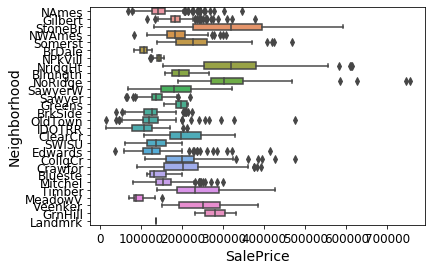

In [91]:
ax = sns.boxplot(x="SalePrice", y="Neighborhood", data=ames, orient="h")

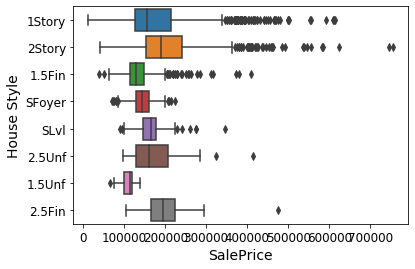

In [92]:
ax = sns.boxplot(x="SalePrice", y="House Style", data=ames, orient="h")

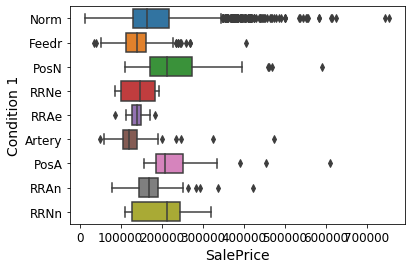

In [93]:
ax = sns.boxplot(x="SalePrice", y="Condition 1", data=ames, orient="h")

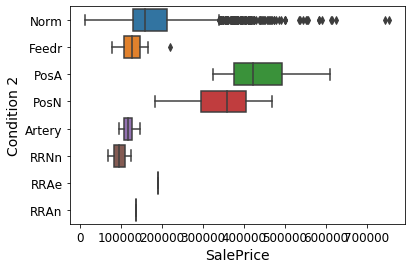

In [94]:
ax = sns.boxplot(x="SalePrice", y="Condition 2", data=ames, orient="h")

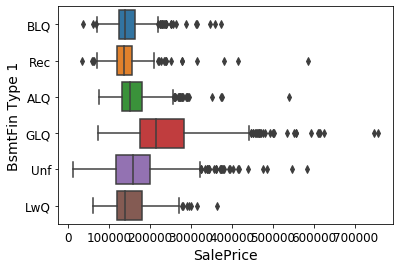

In [95]:
ax = sns.boxplot(x="SalePrice", y="BsmtFin Type 1", data=ames)

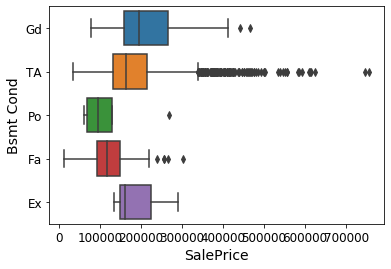

In [96]:
ax = sns.boxplot(x="SalePrice", y="Bsmt Cond", data=ames, orient="h")

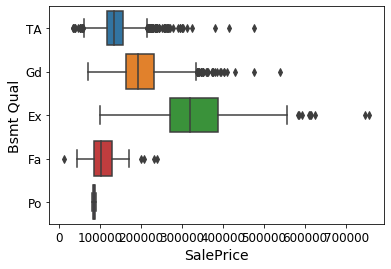

In [97]:
ax = sns.boxplot(x="SalePrice", y="Bsmt Qual", data=ames, orient="h")

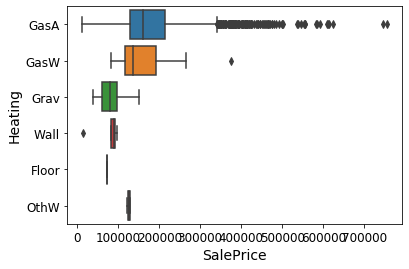

In [99]:
ax = sns.boxplot(x="SalePrice", y="Heating", data=ames, orient="h")

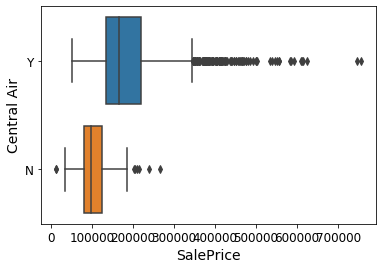

In [100]:
ax = sns.boxplot(x="SalePrice", y="Central Air", data=ames, orient="h")

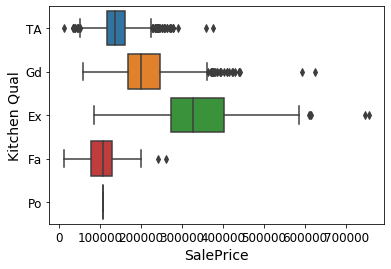

In [101]:
ax = sns.boxplot(x="SalePrice", y="Kitchen Qual", data=ames, orient="h")

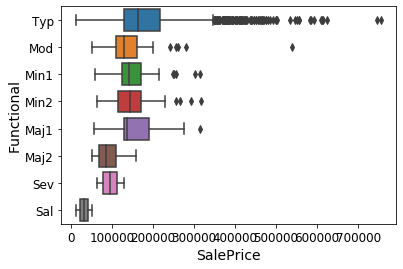

In [102]:
ax = sns.boxplot(x="SalePrice", y="Functional", data=ames, orient="h")

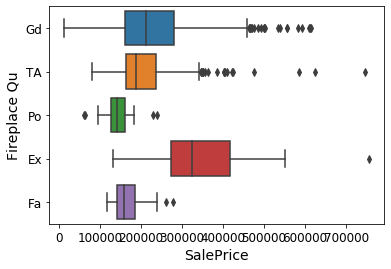

In [103]:
ax = sns.boxplot(x="SalePrice", y="Fireplace Qu", data=ames, orient="h")

Er worden een aantal categorische variabelen niet meegenomen omdat we bij het exploreren van de boxplots hebben gezien dat deze variabelen niet veel verband lijken te hebben met de uitkomst variabele SalesPrice.
Ook laten we de variabelen `Order` en `PID` weg omdat dit administratieve nummers van de huizen zijn, die geen relatie hebben met de uitkomst maat.

In [179]:
dropvars = ["Order", "PID", "Condition 1", "Condition 2", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond", 
            "Bsmt Exposure", "Pool QC", "Fence", "Misc Feature", "Alley", "Heating", "Heating QC", 
            "Central Air", "Electrical", "Functional"]

ames.drop(dropvars, axis=1, inplace=True)  # Let op: vergeet inplace=True niet 
                                           # om aan te geven dat de verandering
                                           # in de dataframe en dat de oude versie door 
                                           # de nieuwe moet worden vervangen.
#ames = ames.drop(dropvars, axis=1)
    
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 64 columns):
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2930 non-null object
Exterior 1st       2930 non-null object
Exterior 2nd       2930 non-null object
Mas Vnr Type       2907 non-null object
Mas Vnr Area      

## Recode missing values for categorical (object) variables

In [180]:
# recoding missing values on entire data set leads to data snooping because information from the test set
# is used to obtain the median values of the variables. Therefore, recoding voor missing values with the median should be done
# on the training set and test separately. For the categorical variables this has no consequence and therefore the missing
# values for the categorical variables are replaced by "unknown" here.

# select categorical columns and numerical columns
object_columns = list(ames.select_dtypes(include = np.object))

# Replace missing values for categorical variables in the training set
ames.loc[:, object_columns] = ames.loc[:, object_columns].fillna(value="unknown")


In [26]:
# Get dummies for training set and test set
# using the information in this blog to create dummy variables with the first level dropped (or the last)
# https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

#categorical_select = ames.dtypes==object
#print(categorical_select)

#categorical_cols = ames.columns[categorical_select].tolist()
#print(categorical_cols)

#ames = pd.get_dummies(ames, prefix_sep='_', drop_first=True)

#ames.head()



['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Kitchen Qual', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


We ontdekken dat de training data set 80 variabelen bevat, terwijl de orginele data set er 82 heeft. We besluiten om zelf een training / test data set te maken met een verdeling van 70% (training) en 30% (test). 

In [106]:
#traindata = ames.sample(frac = 0.7, random_state = 1)
#traindata.info()

We hebben nu de training data set aangemaakt, maar nu moeten we nog de test set construeren en die bestaat uit de resterende 30% van de rijen van de originele data set. Maar hoe ga je die nu uit de originele data set halen? Dat kan wel, met een identificerende variabele, bijvoorbeeld het object nummer, `PID` in de data set. Maar dat is wat omslachtig. We kunnen ook gewoon de ingebouwde functie `train_test_split` gebruiken. 

In [181]:
# Maak training data set en test set.
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(ames, test_size=0.3)
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 2210 to 860
Data columns (total 64 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1704 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd       2051 non-null object
Mas Vnr Type       2051 non-null object
Mas Vnr Area    

In [182]:
traindata.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2210,90,RH,82.0,6270,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,145000
782,20,RL,65.0,25095,Pave,IR1,Low,AllPub,Inside,Sev,...,0,0,60,0,0,6,2009,WD,Partial,143000
2310,60,RL,60.0,8238,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,183500
299,120,RM,35.0,3907,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,0,0,0,0,3,2010,WD,Normal,162500
2423,120,RM,NaN,3072,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,178740
1995,70,RM,90.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,117500
2177,20,RL,74.0,8536,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2007,New,Partial,155000
1562,120,RM,44.0,3842,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,0,155,0,0,1,2008,WD,Normal,275000
2229,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624
1592,85,RL,150.0,14137,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,171,0,0,11,2008,ConLD,Normal,173000


In [90]:
testdata.shape

(879, 82)

In [22]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 753 to 1653
Columns: 194 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(26), uint8(157)
memory usage: 395.7 KB


## Checking the missing values

Visualize missing values of a `pandas` data frame: https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

Another package to explore missing value patterns: missingno

see: https://github.com/ResidentMario/missingno

https://www.kaggle.com/jpmiller/patterns-of-missing-data




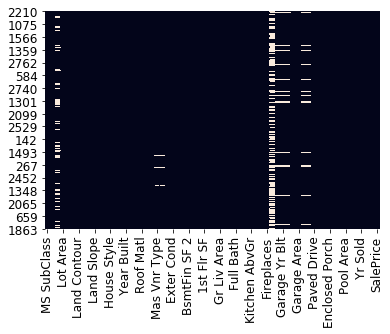

In [109]:
sns.heatmap(traindata.isnull(), cbar=False)

Verdeling van de uitkomst variabele, `SalePrice` bekijken. 

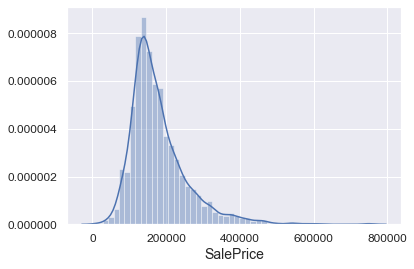

In [183]:
sns.distplot(traindata['SalePrice'])

Het is duidelijk dat de verkoop prijs scheef verdeeld is. In de modelering fase nemen we de log van deze variabele. 

In [174]:
traindata['SalePrice'].skew()

1.7269339919460922

## Missende waarden aanpassen



In [74]:
# dit is een probeersel
#traindata_obj = traindata.select_dtypes(include=['object'])
#traindata_obj.info()


In [75]:
#traindata_obj.head()

Nog een probeersel: kijken of we alle NaN's in objecten kunnen vervangen door '100'. We proberen dit op de kolom `Alley`.

In [76]:
#traindata_obj['Alley'].fillna('100', inplace = True)
#traindata_obj.head()

In [111]:
#traindata.reset_index(inplace=True, drop=True)
#traindata.head(10)

In [112]:
#na_rows1 = traindata[traindata["Mas Vnr Area"].isna()]
#na_rows1["Mas Vnr Area"]

In [113]:
#na_rows2 = traindata[traindata["Lot Frontage"].isna()]
#na_rows2["Lot Frontage"]

In [114]:
#traindata.iloc[0]

In [115]:
#traindata["Lot Frontage"].iloc[0]


In [116]:
#traindata["Mas Vnr Area"].iloc[181]

Nu gaan we echt programmeren. Deze functie vervangt voor categorische variabelen de NaN door de waarde '100' (string) en voor numerieke variabelen de NaN door de mediaan van de betreffende variabele. 

In [117]:
# First try to deal with missing values.

#columns = list(traindata)
#for i in columns:
#    datatype = traindata.dtypes[i]
#    if datatype == "object":
#        traindata[i].fillna('100', inplace = True)
#    else:
#        traindata[i].fillna(traindata[i].median(), inplace = True)
        
#traindata.head()        
#traindata.info()       

In [184]:
# select numerical columns to replace missing values with the median of the variables for the trainingset and test set separately
# to avoid data snooping.

numeric_columns = list(traindata.select_dtypes(exclude = np.object))

# Replace missing values for numerical variables in the training set
median_numeric_columns = traindata[numeric_columns].median() # to avoid data snooping calculate median on training set only
traindata.loc[:, numeric_columns] = traindata.loc[:, numeric_columns].fillna(value=median_numeric_columns)

# Replace missing values for numerical variables in the test set
median_numeric_columns = testdata[numeric_columns].median() 
testdata.loc[:, numeric_columns] = testdata.loc[:, numeric_columns].fillna(value=median_numeric_columns)

In [185]:
traindata.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2210,90,RH,82.0,6270,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,145000
782,20,RL,65.0,25095,Pave,IR1,Low,AllPub,Inside,Sev,...,0,0,60,0,0,6,2009,WD,Partial,143000
2310,60,RL,60.0,8238,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,183500
299,120,RM,35.0,3907,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,0,0,0,0,3,2010,WD,Normal,162500
2423,120,RM,68.0,3072,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,178740
1995,70,RM,90.0,9900,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,117500
2177,20,RL,74.0,8536,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2007,New,Partial,155000
1562,120,RM,44.0,3842,Pave,IR1,HLS,AllPub,Inside,Mod,...,0,0,155,0,0,1,2008,WD,Normal,275000
2229,20,RL,68.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624
1592,85,RL,150.0,14137,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,171,0,0,11,2008,ConLD,Normal,173000


In [120]:
testdata.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1357,70,RM,69.0,5100,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,161000
2367,160,RM,21.0,1890,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,116000
2822,60,RL,62.0,7162,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,196500
2126,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,123600
1544,30,RM,50.0,7000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,116,0,0,0,0,7,2008,WD,Normal,126000
2415,20,RL,102.0,11660,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,174190
2227,120,RM,35.0,3907,Pave,IR1,Bnk,AllPub,Inside,Mod,...,0,0,0,0,0,3,2007,WD,Normal,200000
410,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
761,20,RL,50.0,4280,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,9,2009,WD,Normal,88750
436,60,RL,59.0,23303,Pave,IR3,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2009,WD,Family,409900


Check of het gelukt is.

In [121]:
# Check if it works
#traindata["Mas Vnr Area"].iloc[181]

In [122]:
#traindata["Lot Frontage"].iloc[0]

We vragen een correlatie heatmap op van de gehele training data set. We kiezen voor een heatmap vanwege het grote aantal variabelen (62).

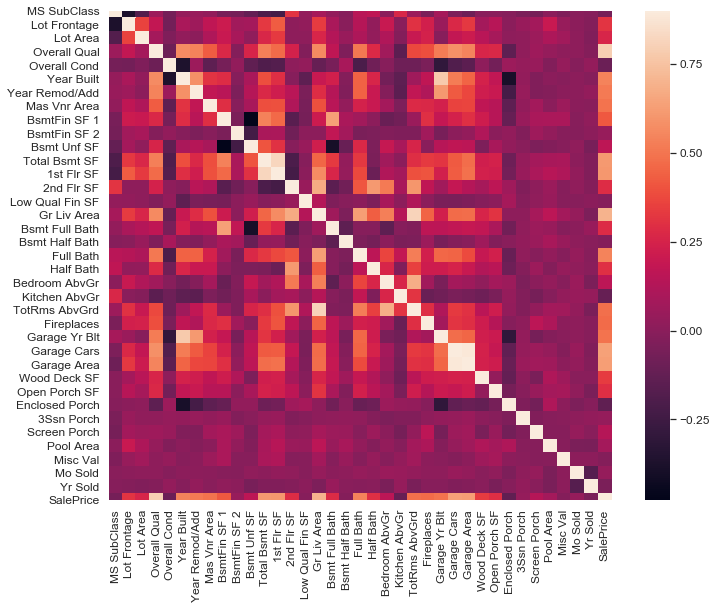

In [186]:
corrmat = traindata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);


**Conclusies van de correlatiematrix**

De volgende variabelen hebben een hoge correlatie met SalePrice:
`Overall Qual`, `Year Built`, `Year Remod/Add`, `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area`, `Garage Cars`, `Garage Area`

De correlaties zijn overwegend positief, er zijn een aantal hoge positieve correlaties (> 0.75), maar er zijn geen hoge negatieve correlaties en relatief minder negatieve correlaties. 

Verder valt op dat er een aantal predictoren onderling hoge correlaties hebben:
`Garage Year Blt` en `Year Built`;
`Gr. Liv Area` en `TotRms AbvGrd`;
`Garage Cars` en `Garage Area`;
`1st Flr SF` en `Total Bsmt SF`.


Het is toch lastig om in de heatmap een aantal variabelen te selecteren met die een hoge correlatie hebben met de uitkomst maat. Daarom een heatmap van de 10 grootste correlaties. 

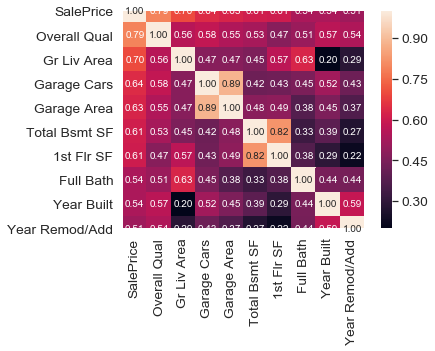

In [124]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(traindata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We inspecteren de verdeling van de continue variabelen die voorkomen in de vorige heatmap plot van de 10 hoogste correlaties met de uitkomst maat. 

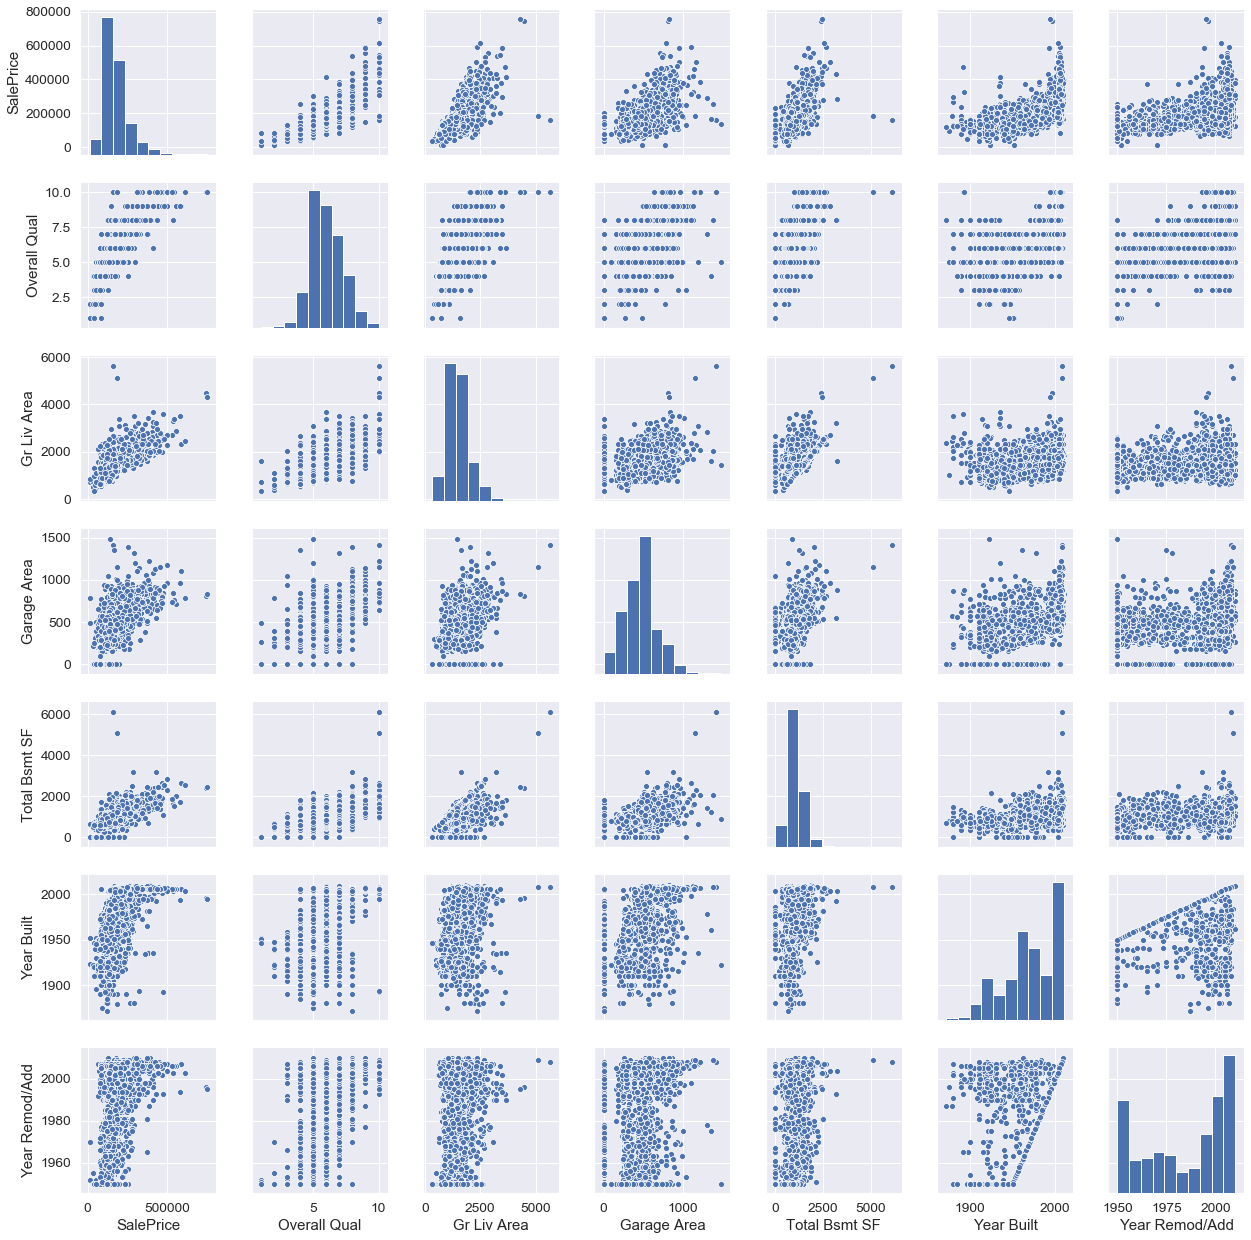

In [125]:
sns.pairplot(traindata[['SalePrice','Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF',
                        'Year Built', 'Year Remod/Add']]);

In [187]:
import sklearn
#from sklearn.utils import estimator_html_repr
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [188]:
# prepare X and y, using log(SalePrice) throughout
X_train = traindata[traindata.columns.drop('SalePrice')]
y_train = np.log(traindata['SalePrice']).reset_index()

# same for test set
X_test = testdata[testdata.columns.drop('SalePrice')]
y_test = np.log(testdata['SalePrice']).reset_index()


In [208]:
y_test

1357    11.989160
2367    11.661345
2822    12.188418
2126    11.724806
1544    11.744037
          ...    
2618    12.242887
497     12.736701
2382    13.049793
325     12.022751
342     11.964001
Name: SalePrice, Length: 879, dtype: float64

### Creating dummy variables with `pandas.get_dummies`



In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1172 to 1560
Data columns (total 63 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1701 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd       2051 non-null object
Mas Vnr Type       2037 non-null object
Mas Vnr Area   

In [189]:
#uint8_selector = X_train.dtypes=="uint8"
#numeric_selector = X_train.dtypes!="uint8"

object_selector = X_train.dtypes=="object"
numeric_selector = X_train.dtypes!="object"

In [190]:
#uint8_selector

object_selector

MS SubClass       False
MS Zoning          True
Lot Frontage      False
Lot Area          False
Street             True
                  ...  
Misc Val          False
Mo Sold           False
Yr Sold           False
Sale Type          True
Sale Condition     True
Length: 63, dtype: bool

In [191]:
numeric_selector

MS SubClass        True
MS Zoning         False
Lot Frontage       True
Lot Area           True
Street            False
                  ...  
Misc Val           True
Mo Sold            True
Yr Sold            True
Sale Type         False
Sale Condition    False
Length: 63, dtype: bool

In [58]:
#X_train_dummy_columns = X_train.columns[uint8_selector].tolist()
#X_train_numeric_columns = X_train.columns[numeric_selector].tolist()
#X_train_numeric = X_train.drop(columns = X_train_dummy_columns)
#X_train_dummy = X_train.drop(columns = X_train_numeric_columns)

#X_test_dummy_columns = X_test.columns[uint8_selector].tolist()
#X_test_numeric_columns = X_test.columns[numeric_selector].tolist()
#X_test_numeric = X_test.drop(columns = X_test_dummy_columns)
#X_test_dummy = X_test.drop(columns = X_test_numeric_columns)

In [192]:
X_train_cat_columns = X_train.columns[object_selector].tolist()
X_train_numeric_columns = X_train.columns[numeric_selector].tolist()
X_train_numeric = X_train.drop(columns = X_train_cat_columns)
X_train_cat = X_train.drop(columns = X_train_numeric_columns).reset_index()

X_test_cat_columns = X_test.columns[object_selector].tolist()
X_test_numeric_columns = X_test.columns[numeric_selector].tolist()
X_test_numeric = X_test.drop(columns = X_test_cat_columns)
X_test_cat = X_test.drop(columns = X_test_numeric_columns).reset_index()

In [194]:
X_train_cat

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,House Style,...,Foundation,Kitchen Qual,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
2210,RH,Pave,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Duplex,2Story,...,CBlock,TA,unknown,2Types,Unf,TA,TA,Y,WD,Normal
782,RL,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,1Fam,1Story,...,CBlock,Ex,Gd,Attchd,Unf,TA,TA,Y,WD,Partial
2310,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,...,PConc,TA,TA,Attchd,Fin,TA,TA,Y,WD,Normal
299,RM,Pave,IR1,HLS,AllPub,Inside,Mod,Blueste,TwnhsE,1Story,...,CBlock,Gd,TA,Attchd,Unf,TA,TA,Y,WD,Normal
2423,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,TwnhsE,1Story,...,PConc,Gd,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,2fmCon,1Story,...,CBlock,TA,unknown,2Types,Unf,TA,TA,N,WD,Normal
1095,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,2Story,...,PConc,Gd,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
1130,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,1Fam,2Story,...,PConc,Gd,unknown,Attchd,RFn,TA,TA,Y,WD,Normal
1294,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,1Fam,1.5Fin,...,BrkTil,Ex,Gd,Detchd,Unf,Fa,Fa,N,WD,Normal


In [ ]:
# Get dummies for training set and test set
# using the information in this blog to create dummy variables with the first level dropped (or the last)
# https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

#categorical_select = ames.dtypes==object
#print(categorical_select)

#categorical_cols = ames.columns[categorical_select].tolist()
#print(categorical_cols)

#ames = pd.get_dummies(ames, prefix_sep='_', drop_first=True)

#ames.head()

In [195]:
# Get dummy variables for the training set.

X_train_dummy = pd.get_dummies(X_train_cat, prefix_sep='_', drop_first=True)

In [196]:
X_train_dummy

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2210,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
782,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2310,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2423,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1095,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1130,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1294,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [197]:
# Get dummy variables for the test set.

X_test_dummy = pd.get_dummies(X_test_cat, prefix_sep='_', drop_first=True)

In [198]:
X_test_dummy

,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1357,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2367,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2822,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2126,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1544,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
497,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2382,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
325,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### Scale the continuous variables

In [199]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train_numeric)
print(np.std(X_train_scaled))

X_test_scaled = preprocessing.scale(X_test_numeric)
print(np.std(X_test_scaled))

1.0
1.0


In [200]:
X_train.index

Int64Index([2210,  782, 2310,  299, 2423, 1995, 2177, 1562, 2229, 1592,
            ...
            1482,  330, 1238,  466, 2169, 1638, 1095, 1130, 1294,  860],
           dtype='int64', length=2051)

In [201]:
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns=X_train_numeric_columns, index=X_train.index)
X_train_scaled_df.head()

X_test_scaled_df = pd.DataFrame(data=X_test_scaled, columns=X_test_numeric_columns, index=X_test.index)
X_test_scaled_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1357,0.316097,0.002810,-0.774026,1.251275,1.395916,-1.672374,0.506381,-0.568378,-0.964192,-0.299069,...,-1.160389,0.772138,0.234402,-0.322443,-0.107895,-0.272785,-0.054733,-0.113216,-0.114265,0.154628
2367,2.474615,-2.322133,-1.273617,-0.131341,1.395916,-0.086304,-0.633219,1.476203,-0.348177,-0.299069,...,-0.995328,-0.712140,-0.719833,-0.322443,-0.107895,-0.272785,-0.054733,-0.113216,0.248330,-1.364009
2822,0.076262,-0.336244,-0.453105,0.559967,-0.451991,0.959827,0.886248,0.453913,-0.964192,-0.299069,...,0.618604,0.586603,0.143522,-0.322443,-0.107895,-0.272785,-0.054733,-0.113216,-0.476859,-1.364009
2126,-0.883080,-0.433117,-0.311788,-1.513956,-0.451991,0.656111,0.458898,-0.568378,0.320264,-0.299069,...,-2.205777,-0.712140,-0.719833,-0.322443,-0.107895,-0.272785,-0.054733,-0.113216,0.610924,-0.604690
1544,-0.643244,-0.917480,-0.478318,-0.131341,2.319870,-1.638628,0.601348,-0.568378,-0.311042,-0.061752,...,-1.311695,-0.712140,-0.719833,1.769673,-0.107895,-0.272785,-0.054733,-0.113216,0.248330,0.154628


In [202]:
X_train = pd.concat([X_train_scaled_df, X_train_dummy], axis=1)
X_train.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2210,0.752376,0.596039,-0.464085,-0.756619,0.361089,-0.690420,-1.629152,-0.565390,-0.350174,-0.291724,...,0,0,0,0,1,0,0,0,1,0
782,-0.874655,-0.190834,1.770348,-0.756619,2.143505,-0.065290,0.924802,-0.565390,1.938420,-0.291724,...,0,0,0,0,1,0,0,0,0,1
2310,0.055077,-0.422267,-0.230493,-0.038846,-0.530119,0.888856,0.683863,-0.565390,0.565264,-0.291724,...,0,0,0,0,1,0,0,0,1,0
299,1.449675,-1.579434,-0.744561,1.396700,-0.530119,0.625643,0.250172,-0.565390,-0.807892,-0.291724,...,0,0,0,0,1,0,0,0,1,0
2423,1.449675,-0.051974,-0.843671,0.678927,-0.530119,1.119167,0.972990,-0.462748,-0.975136,-0.291724,...,0,0,0,0,1,0,0,0,1,0


In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 2210 to 860
Columns: 193 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(36), uint8(157)
memory usage: 907.3 KB


In [204]:
X_test = pd.concat([X_test_scaled_df, X_test_dummy], axis=1)
X_test.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1357,0.316097,0.002810,-0.774026,1.251275,1.395916,-1.672374,0.506381,-0.568378,-0.964192,-0.299069,...,0,0,0,0,1,0,0,0,1,0
2367,2.474615,-2.322133,-1.273617,-0.131341,1.395916,-0.086304,-0.633219,1.476203,-0.348177,-0.299069,...,0,0,0,0,1,0,0,0,1,0
2822,0.076262,-0.336244,-0.453105,0.559967,-0.451991,0.959827,0.886248,0.453913,-0.964192,-0.299069,...,0,0,0,0,1,0,0,0,1,0
2126,-0.883080,-0.433117,-0.311788,-1.513956,-0.451991,0.656111,0.458898,-0.568378,0.320264,-0.299069,...,0,0,0,0,1,0,0,0,1,0
1544,-0.643244,-0.917480,-0.478318,-0.131341,2.319870,-1.638628,0.601348,-0.568378,-0.311042,-0.061752,...,0,0,0,0,1,0,0,0,1,0


In [205]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 1357 to 342
Columns: 178 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(36), uint8(142)
memory usage: 376.0 KB


## KNN regression

In [74]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred, digits=3))

ValueError: Unknown label type: 'continuous'

In [206]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate

lasso = Lasso(max_iter=10000, normalize=True)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

ValueError: shapes (879,178) and (193,) not aligned: 178 (dim 1) != 193 (dim 0)

In [84]:
pd.Series(lasso.coef_, index=X_train.columns)  #.where(lambda x: x > 0)

MS SubClass                    NaN
Lot Frontage              0.008107
Lot Area                  0.012564
Overall Qual              0.100589
Overall Cond              0.047731
                            ...   
Sale Condition_AdjLand    0.094926
Sale Condition_Alloca     0.045329
Sale Condition_Family          NaN
Sale Condition_Normal     0.074265
Sale Condition_Partial    0.061609
Length: 199, dtype: float64